# verification des donnée avec les datasets simples 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
# fonction pour funcformatter

def nombre_en_milliard(nb,pos):
    return format(round(nb/(10e9)),'_').replace("_"," ")

def nombre_en_million(nb,pos):
    return format(round(nb/(10e6)),'_').replace("_"," ")

In [3]:
# config graphe
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [4]:
depenses = pd.read_csv('donnee/depenses.csv',sep=';')

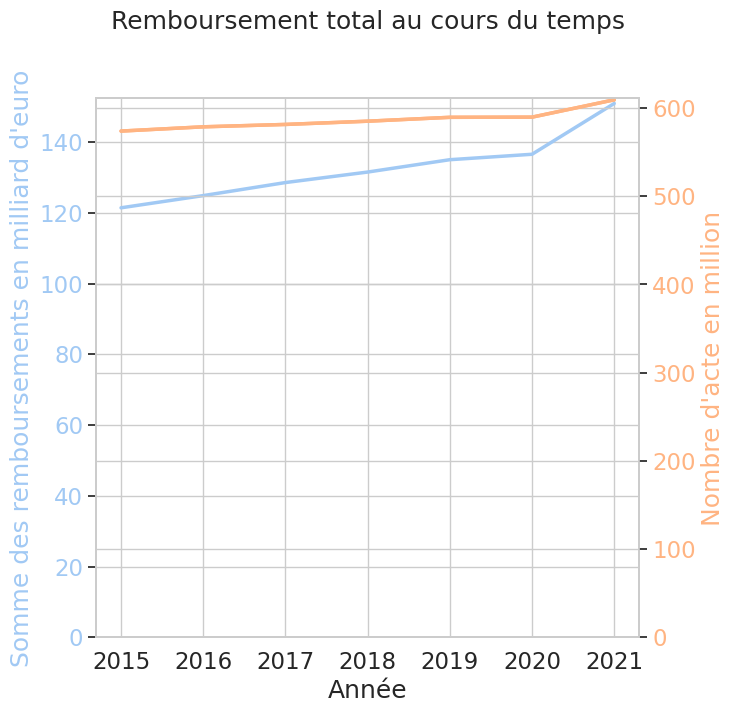

In [5]:
# regoupement des datas pour affichages
data_annee = depenses.groupby(by=['annee'],observed=False).agg(montant=('montant','sum')
,montant_moyen=('montant_moy','mean')
,nb_acte=('Ntop','sum')).reset_index()
couleur_axe_1 = 0
couleur_axe_2 = 1

# affichage
fig,ax1 = plt.subplots()
sns.lineplot(ax=ax1,data=data_annee,x='annee',y='montant',color=palette[couleur_axe_1])
fig.set_size_inches(7,7)
ax1.set_title('Remboursement total au cours du temps',pad=50)
ax1.set_xlabel('Année')
ax1.set_ylabel('Somme des remboursements en milliard d\'euro',color=palette[couleur_axe_1])
ax1.tick_params(axis='y', labelcolor=palette[couleur_axe_1])
ax1.yaxis.set_major_formatter(FuncFormatter(nombre_en_milliard))
ax1.set_ylim(0)

ax2 = ax1.twinx()

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])
ax2.set_ylabel('Nombre d\'acte en million',color=palette[couleur_axe_2])
ax2.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax2.tick_params(axis='y', labelcolor=palette[couleur_axe_2])
ax2.set_ylim(0)

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])

plt.show()

#suppression des données en ram
del data_annee